<a href="https://colab.research.google.com/github/curry0622/DSAI-HW-2022/blob/master/HW1/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library

In [62]:
import csv
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime as dt
from matplotlib import pyplot as plt, dates as mdates

## Data Explore

In [63]:
training_set = pd.read_csv('training_data.csv')
training_set.head()

,日期,淨尖峰供電能力(MW),尖峰負載(MW),備轉容量(MW),備轉容量率(%),工業用電(百萬度),民生用電(百萬度),核一#1(萬瓩),核一#2(萬瓩),核二#1(萬瓩),...,大觀二,明潭,碧海,立霧,龍澗,卓蘭,水里,其他小水力,風力發電,太陽能發電
0,20210101,28487.0,25720.0,2767,10.76,311.468,212.061,0.0,0.0,98.4,...,50.4,65.6,5.8,1.5,2.4,2.5,0.0,14.9,30.6,0.0
1,20210102,28421.0,25485.0,2936,11.52,304.952,207.625,0.0,0.0,98.4,...,44.1,71.5,5.5,1.4,3.0,3.0,0.0,18.5,37.0,0.1
2,20210103,28513.0,25476.0,3037,11.92,299.771,204.098,0.0,0.0,98.4,...,49.3,65.0,5.1,1.4,3.6,0.0,0.0,12.3,48.0,0.0
3,20210104,32766.0,29734.0,3032,10.20,342.273,233.036,0.0,0.0,98.3,...,46.2,64.6,5.0,1.4,3.0,2.5,0.0,14.9,40.3,0.0
4,20210105,33117.0,30050.0,3067,10.21,353.795,240.880,0.0,0.0,98.4,...,31.6,48.4,5.8,1.4,3.0,2.5,0.0,21.8,63.0,0.0


## Data Plot

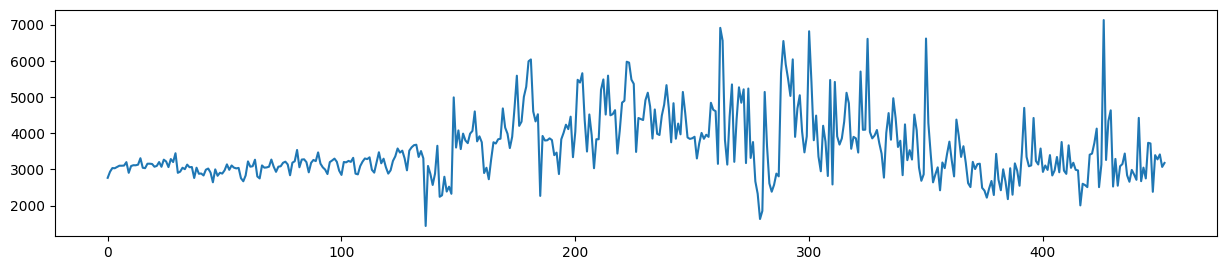

In [64]:
training_set = pd.read_csv('training_data.csv')

dates = training_set.iloc[:,0:1].values.flatten()
# dates = [dt.strptime(str(d), "%Y%m%d").date() for d in dates]

training_set = training_set.iloc[:,3:4].values

plt.rcParams['figure.figsize'] = [15, 3]
plt.rcParams['figure.dpi'] = 100

plt.plot(
  training_set,
  label='Real Data'
)

plt.show()

## Dataloading

In [65]:
def sliding_windows(data, seq_length, pred_length):
    x = []
    y = []

    for i in range(len(data) - seq_length - 1 - pred_length):
        _x = data[i : (i + seq_length)]
        _y = data[i + seq_length : (i + seq_length + pred_length)]

        x.append(_x)
        # y.append(_y)
        y.append(_y.flatten())

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 5
pred_length = 15
x, y = sliding_windows(training_data, seq_length, pred_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

## Model

In [66]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

## Training

[Epoch 0] train loss: 0.5062, test loss: 0.4728
[Epoch 10] train loss: 0.3134, test loss: 0.2886
[Epoch 20] train loss: 0.1978, test loss: 0.18
[Epoch 30] train loss: 0.1182, test loss: 0.1062
[Epoch 40] train loss: 0.0657, test loss: 0.0595
[Epoch 50] train loss: 0.0407, test loss: 0.0392
[Epoch 60] train loss: 0.0312, test loss: 0.0318
[Epoch 70] train loss: 0.0268, test loss: 0.0277
[Epoch 80] train loss: 0.0254, test loss: 0.0263
[Epoch 90] train loss: 0.0251, test loss: 0.026
[Epoch 100] train loss: 0.025, test loss: 0.0258
[Epoch 110] train loss: 0.0249, test loss: 0.0257
[Epoch 120] train loss: 0.0247, test loss: 0.0257
[Epoch 130] train loss: 0.0246, test loss: 0.0256
[Epoch 140] train loss: 0.0245, test loss: 0.0256
[Epoch 150] train loss: 0.0244, test loss: 0.0255
[Epoch 160] train loss: 0.0243, test loss: 0.0255
[Epoch 170] train loss: 0.0242, test loss: 0.0254
[Epoch 180] train loss: 0.0241, test loss: 0.0254
[Epoch 190] train loss: 0.024, test loss: 0.0253
[Epoch 200] trai

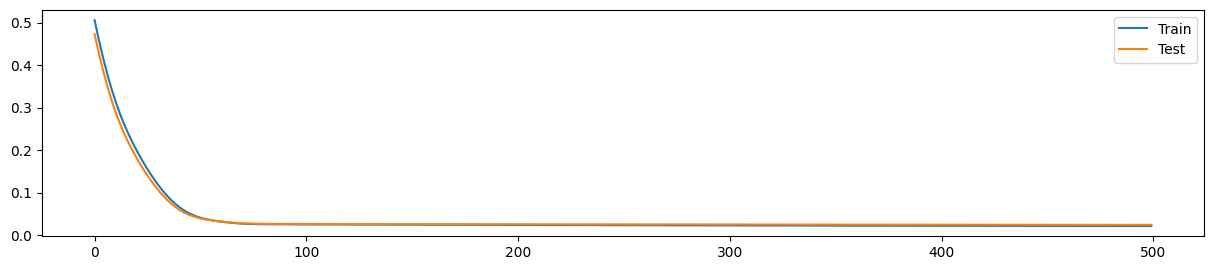

In [67]:
num_epochs = 500
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = pred_length ############################## initial: 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

train_losses = []
test_losses = []

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()

    with torch.no_grad():
      y_test_pred = lstm(testX)
      test_loss = criterion(y_test_pred, testY)
    test_losses.append(test_loss.item())

    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()

    train_losses.append(loss.item())
    
    optimizer.step()
    if epoch % 10 == 0:
      print(f"[Epoch {epoch}] train loss: {round(loss.item(), 4)}, test loss: {round(test_loss.item(), 4)}")

plt.plot(
  train_losses,
  label='Train'
)
plt.plot(
  test_losses,
  label='Test'
)
plt.legend()

## Random Testing Plot

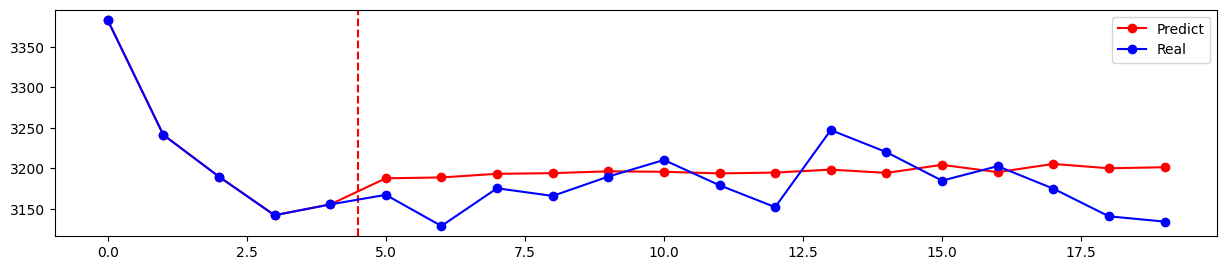

In [75]:
idx = np.random.randint(len(testX))

real_data = np.concatenate((
  testX[idx].data.numpy().flatten(),
  testY[idx].data.numpy().flatten()
))

lstm.eval()
pred_data = lstm(torch.unsqueeze(testX[idx], 0))
pred_data = np.concatenate((
  real_data[:seq_length],
  pred_data.data.numpy().flatten()
))

real_data = sc.inverse_transform(np.expand_dims(
  real_data,
  axis=0
)).flatten()
pred_data = sc.inverse_transform(np.expand_dims(
  pred_data,
  axis=0
)).flatten()

plt.axvline(x=seq_length-0.5, c='r', linestyle='--')
plt.plot(
  pred_data,
  label = 'Predict',
  c='r',
  marker='o'
)
plt.plot(
  real_data,
  label = 'Real',
  c='b',
  marker='o'
)
plt.legend()

## Prediction of  2022/03/30 ~ 2022/04/13 (15 days)

Model input: [3394 3277 3414 3069 3179]
Model output: [3212.0981 3209.0598 3211.6675 3212.2737 3206.6743 3218.7263 3211.16
 3211.3125 3217.144  3205.2776 3208.815  3206.467  3211.7585 3208.0244
 3214.0903]


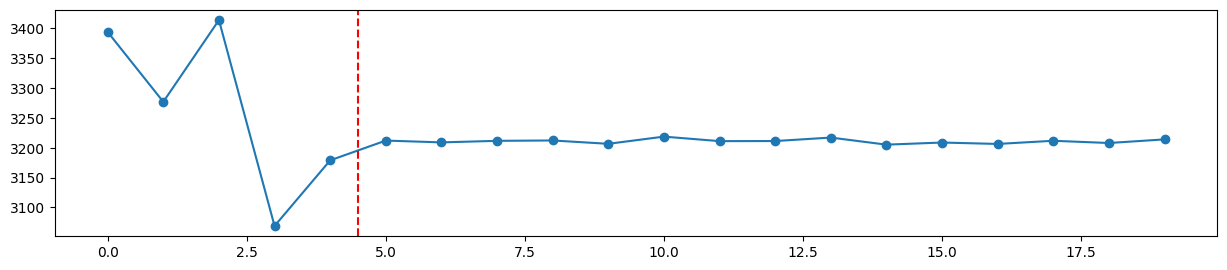

In [69]:
real_data = sc.fit_transform(np.array(training_set[-seq_length:]))
real_data = Variable(torch.Tensor(real_data))
real_data = torch.unsqueeze(real_data, 0)

lstm.eval()
pred_data = lstm(real_data)
pred_data = sc.inverse_transform(np.expand_dims(
  torch.squeeze(pred_data, 0).data.numpy(),
  axis=0
)).flatten()

plt_data = np.concatenate((
  training_set[-seq_length:].flatten(),
  pred_data
))
plt.plot(
  plt_data,
  marker='o'
)
plt.axvline(x=seq_length-0.5, c='r', linestyle='--')

print('Model input:', training_set[-seq_length:].flatten())
print('Model output:', pred_data)

## Save prediction to .csv

In [70]:
dict = {'date': dates[-pred_length:], 'operating_reserve(MW)': pred_data}  

df = pd.DataFrame(dict) 

df.to_csv('submission.csv') 